In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline


In [2]:

path="FuelConsumptionCo2.csv"
df= pd.read_csv("FuelConsumptionCo2.csv")
df.head(9)


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267


<function matplotlib.pyplot.show(close=None, block=None)>

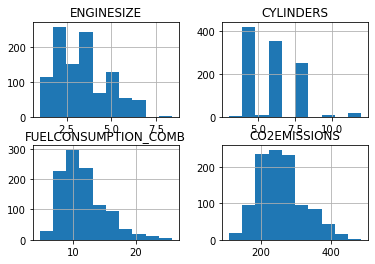

In [8]:
cdf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)
cdf.hist()
plt.show

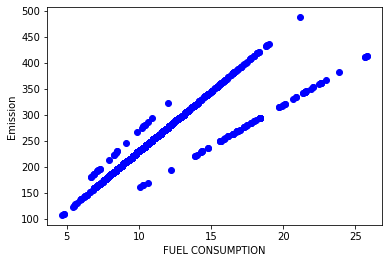

In [11]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel("FUEL CONSUMPTION")
plt.ylabel("Emission")
plt.show()

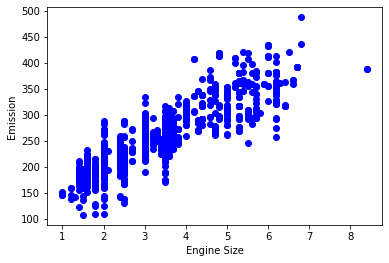

In [12]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

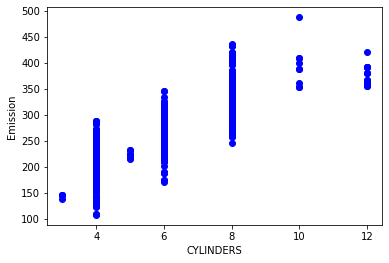

In [13]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel("CYLINDERS")
plt.ylabel("Emission")
plt.show()

In [14]:
msk = np.random.rand(len(df))< 0.8
train= cdf[msk]
test = cdf[~msk]

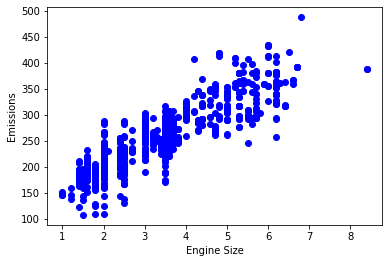

In [15]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,color = 'blue')
plt.xlabel("Engine Size")
plt.ylabel("Emissions")
plt.show()

In [19]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x= np.asanyarray(train[['ENGINESIZE']])
train_y= np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x,train_y)
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)


Coefficients:  [[38.91332708]]
Intercept:  [125.5334523]


Text(0, 0.5, 'Emissions')

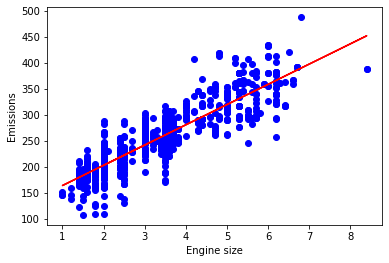

In [23]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
plt.plot(train_x,regr.coef_[0][0]*train_x+regr.intercept_[0],'-r')
plt.xlabel("Engine size")
plt.ylabel("Emissions")


In [24]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)
print("Mean Absolute Error: %.2f" %np.mean(np.absolute(test_y_-test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean Absolute Error: 24.43
Residual sum of squares (MSE): 1070.69
R2-score: 0.72


In [25]:
train_x= np.asanyarray(train[['ENGINESIZE']])

In [27]:
cdf['ENGINESIZE']

0       2.0
1       2.4
2       1.5
3       3.5
4       3.5
       ... 
1062    3.0
1063    3.2
1064    3.0
1065    3.2
1066    3.2
Name: ENGINESIZE, Length: 1067, dtype: float64

In [29]:
train_x= train[["FUELCONSUMPTION_COMB"]]
test_x= test[["FUELCONSUMPTION_COMB"]]

In [30]:
regr = linear_model.LinearRegression()
regr.fit(train_x,train_y)

LinearRegression()

In [31]:
predictions = regr.predict(test_x)

In [33]:


print("Mean Absolute Error: %.2f" % np.mean(np.absolute(predictions - test_y)))

Mean Absolute Error: 20.17


In [3]:
cdf= df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


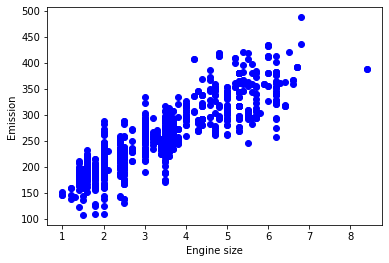

In [8]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [9]:
msk = np.random.rand(len(df))< 0.8
train = cdf[msk]
test = cdf[~msk]

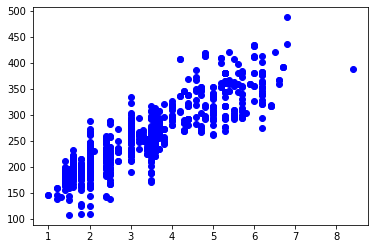

In [12]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')

In [14]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x,y)
#The Coefficients
print(regr.coef_)

[[11.36981954  7.31515369  9.61960749]]


In [15]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
print ('Coefficients: ', regr.coef_)
y_= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"% np.mean((y_ - y) ** 2))
print('Variance score: %.2f' % regr.score(x, y))

Coefficients:  [[11.41180085  6.90406857  6.40167398  2.86386774]]
Residual sum of squares: 467.12
Variance score: 0.86


C:\Program Files\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y= np.asanyarray(train[['CO2EMISSIONS']])

test_x= np.asanyarray(train[['ENGINESIZE']])
test_y= np.asanyarray(train[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=2)
train_x_poly= poly.fit_transform(train_x)
train_x_poly                      
                      

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

In [18]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)

print('Coefficient: ', clf.coef_)
print('Intercept: ', clf.intercept_ )

Coefficient:  [[ 0.         48.54476078 -1.1746431 ]]
Intercept:  [110.1196112]


Text(0, 0.5, 'Emission')

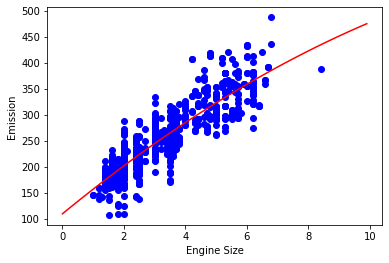

In [22]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX + clf. coef_[0][2]*np.power(XX,2)
plt.plot(XX,yy,'-r')
plt.xlabel("Engine Size")
plt.ylabel("Emission")

In [23]:
x = np.arange(-5.0,5.0,0.1)

y= 2*(x) +3
y_noise = 2* np.random.normal(size = x.size)

In [28]:
ydata= y + y_noise

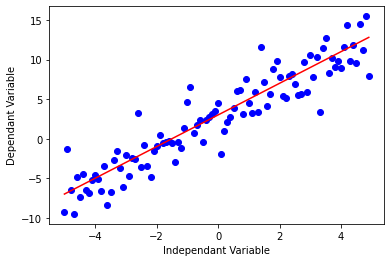

In [31]:
plt.plot(x,ydata,'bo')
plt.plot(x,y,'r')
plt.ylabel('Dependant Variable')
plt.xlabel('Independant Variable')
plt.show()

In [32]:
df = pd.read_csv("china_gdp.csv")
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


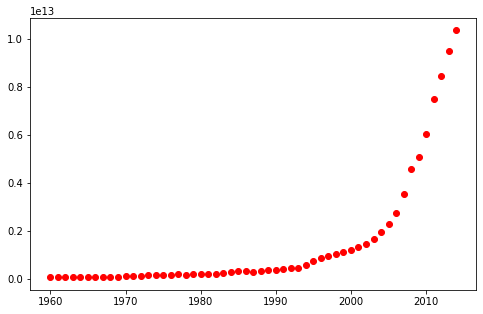

In [44]:
plt.figure(figsize=(8,5))
x_data,y_Data= (df["Year"].values, df["Value"].values)
plt.plot(x_data,y_Data,'ro')


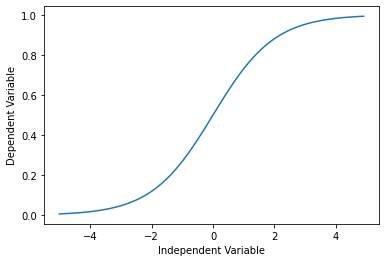

In [38]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

In [40]:
def sigmoid(x,Beta_1, Beta_2):
 y = 1/(1+np.exp(-Beta_1*(x-Beta_2)))
 return y

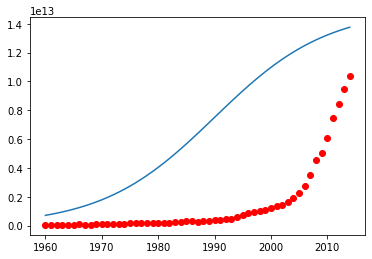

In [46]:
beta_1 = 0.10
beta_2 = 1990.0
Y_pred = sigmoid(x_data, beta_1, beta_2)
plt.plot(x_data,Y_pred*15000000000000.)
plt.plot(x_data, y_Data,'ro')

In [49]:
xdata =x_data/max(x_data)
ydata =y_Data/max(y_Data)

In [50]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid,xdata, ydata)


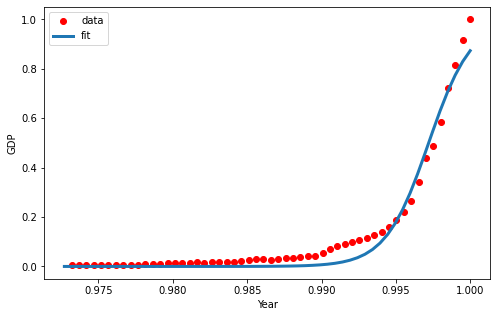

In [51]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()